# **Assignment 1**

### **Group 17**
* **Germán Buttiero (s243660)**
* **Sree Keerthi Desu (s243933)**

# Part 1.1: Exploring WS and BA models

## Did you really read the text? 

### 1. What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

As explained in section 3.5, random networks have the property that in large networks, most of the nodes have a degree relatively close to k. This property clearly does not align with real-world networks, where we have individuals that are highly popular (having more than k connections) and some others with a number of connections far behind k.

### 2. List the four regimes that characterize random networks as a function of  ⟨k⟩
 

We can define 4 regimes according to ⟨k⟩:

1. Subcritical Regime:  0 ‹ ‹k› ‹ 1 (p ‹ 1/N).

    When k = 0, the network has N isolated nodes. By increasing k, we start adding links to the networks, but given that k < 1, the number of links in this network is still very small, as it can be seen in (b) in the image at the bottom. At this point there is no clear giant component.

2. Critical Point: ‹k› = 1 (p = 1/N)

    At this point, most of the nodes are still part of small components (c in the image below). Although a giant component does not yet exist, the size of the largest component increases sharply in absolute terms. However, its relative size with respect to the whole network is still zero.


3. Supercritical Regime: ‹k› › 1 (p › 1/N)

    As seen in (d), this regime starts connecting more isolated nodes. As we move further from the critical regime, more and more nodes get connected to the giant component. This regime ends when all isolated nodes are connected to the giant component.

4. Connected Regime: ‹k› › lnN (p › lnN/N)

    At this threshold, with high probability, the network becomes connected (all nodes belong to a single component). This transition depends on N (point e).


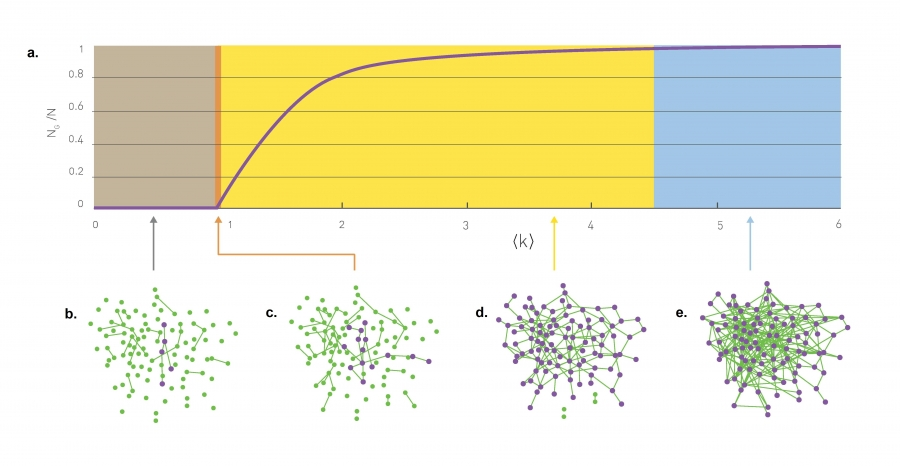

### 3. According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering  C(k) decreases as a function of  k in real-world networks?

In real-world networks, the clustering coefficient C(k) decreases as a function of node degree: high-degree nodes have lower clustering than low-degree ones. Random networks, however, predict a clustering coefficient that is independent of degree and instead depends only on system size. This discrepancy is a problem because it shows that random networks fail to capture the degree-dependent clustering structure observed in real networks.

## WS edition

In [1]:
import networkx as nx

### 1

In [2]:
def create_ws_graph_and_calculate_aspl(n, k, p):
    graph = nx.watts_strogatz_graph(n=n, k=k, p=p)
    aspl = nx.average_shortest_path_length(graph)
    return aspl

In [3]:
for p in [0, 0.01, 1]:
    aspl = create_ws_graph_and_calculate_aspl(n=1000, k=10, p=p)
    print(f"p={p}: ASPL={aspl}")

p=0: ASPL=50.450450450450454
p=0.01: ASPL=8.346652652652653
p=1: ASPL=3.2693733733733734


### 2

As p→1, the Watts–Strogatz network becomes essentially a random graph. In this case, the average shortest path length becomes very small, much shorter than in the lattice case.

### 3

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

p_aspl = []
n=500
k=4
apl_random_graphs = np.round(np.log(n) / np.log(k),2)  # Approximation for random graphs
print("Average Shortest Path Length approximation for random graphs:", apl_random_graphs)

probs = np.arange(0.1, 1.01, 0.05)
closest_value_to_apl = None
min_diff = float('inf')
for prob in probs:
    aspl = create_ws_graph_and_calculate_aspl(n=n, k=k, p=prob)
    p_aspl.append((prob, aspl))
    if abs(aspl - apl_random_graphs) < min_diff:
        min_diff = abs(aspl - apl_random_graphs)
        closest_value_to_apl = (prob, aspl)
print("Closest value to apl_random_graphs:", np.round(closest_value_to_apl[1],2), "with p =", np.round(closest_value_to_apl[0],2))

Average Shortest Path Length approximation for random graphs: 4.48
Closest value to apl_random_graphs: 4.76 with p = 0.95


### 4

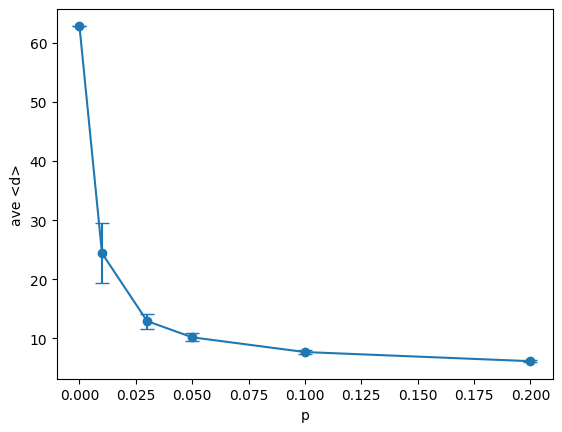

In [5]:
N = 500
k = 4
p_values = [0,0.01,0.03,0.05,0.1,0.2]
avg_dist = []
std_dev = []

for p in p_values:
    total_aspl = 0
    aspl_values = []
    for i in range(50):
        aspl = create_ws_graph_and_calculate_aspl(n=N, k=k, p=p)
        total_aspl += aspl
        aspl_values.append(aspl)
    avg_dist.append(total_aspl / 50)
    std_dev.append(np.std(aspl_values))

plt.errorbar(p_values, avg_dist, yerr=std_dev, marker='o', capsize=5)
plt.xlabel('p')
plt.ylabel('ave <d>')
plt.show()

### 5

Caption: 

Average shortest path length ⟨d⟩ versus rewiring probability p for Watts–Strogatz networks with N = 500 nodes and average degree ⟨k⟩ = 4. Each point shows the mean ⟨d⟩ over 50  network realizations, and the error bars indicate the standard deviation. The plot illustrates that even a small p dramatically reduces the average path length.

## BA Edition

### 1. What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one.

There are three slope dependent regimes of complex networks with power-law distributions:
1. Anomalous Regime (γ≤ 2)

    In this regime, the exponent 1/(γ− 1) is larger than one, which implies that the largest hub grow faster than the size of the network. This would mean that a hub needs more links than there are nodes, which is impossible. Because of this, large networks in this regime cannot really exist.

2. Scale-Free Regime (2 ‹ γ ‹ 3)

    In Scale-Free regimes, the average degree is normal, but the variation in degree is huge. Some nodes become very large hubs, which make the network “ultra-small,” meaning that distances between nodes grow very slowly even as the network gets bigger. 

3. Random Network Regime (γ › 3)

    In here, both mean and variance are finite. Hubs are not very big, so the network looks and behaves much like a random network. In practice it is hard to tell such networks apart from random ones unless the network is extremely large.

### 2. What are the three regimes we find in non-linear preferential attachement?

1. Sublinear Preferential Attachment (0 < α < 1)

    New nodes prefer to connect to nodes with more links, but the preference is weak. Hubs exist, but they grow slowly, and the network is fairly balanced; the degree distribution is a stretched exponential, not a power law.

2. Linear Regime (α=1)

    New nodes attach to existing nodes exactly in proportion to their degree. This produces a scale-free network, where some nodes become hubs, but many smaller nodes coexist, and the degree distribution follows a power law.

3. Superlinear Regime (α > 1)

    High-degree nodes attract links much faster than lower-degree nodes. Eventually, a single hub dominates the network, forming a star-like structure where most nodes connect to the same hub.

### Graph Process

1. In order to create our own Barabasi-Albert model, we will first start by creating a graph with only one link

In [6]:
# Creation of a graph with one link
G = nx.Graph()
G.add_edge(0, 1)

2. We create a custom function adds a new node to the graph, connecting it to an existing node according to their degree.
First, we get a list with the edges of the graph and we flatten it to just store the nodes. The amount of times a node is present in the list, represents the probability of connecting to that node.

In [7]:
# Function to add a new node connected to an existing node according to their degree.
def add_node(G):
    """ Adds a new node to the graph G and connects it to an existing node chosen with probability proportional to its degree.
    """
    new_node = len(G.nodes)
    edges = list(G.edges)
    flat_edges = [node for edge in edges for node in edge]
    chosen_node = random.choices(flat_edges)[0]
    G.add_edge(new_node, chosen_node)
    return G

for _ in range(98):
    G = add_node(G)

3. We plot the network

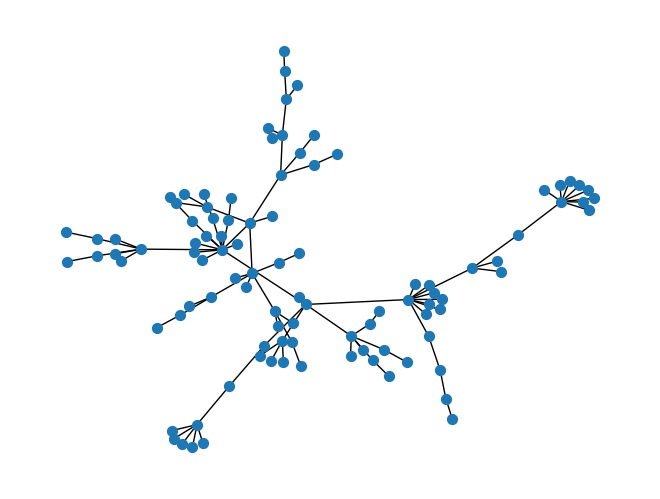

In [8]:
nx.draw(G, with_labels=False, node_size=50)

4. We add more nodes until we have a graph with 5000 nodes

In [9]:
#we add 4900 more nodes to have a total of 5000 nodes
for i in range(4900):
    G = add_node(G)

5. We calculate the min and max degree of the graph

In [10]:
print(f'The maximum degree in the graph is {max(dict(G.degree).values())}, and the minimum degree is {min(dict(G.degree).values())}.')

The maximum degree in the graph is 82, and the minimum degree is 1.


6. Finally, we bin the degree distribution and we generate a plot in linear scale and log-log scale

In [11]:
# now we bin the degrees.
bins = np.histogram(list(dict(G.degree).values()), bins=range(1, max(dict(G.degree).values()) + 2))

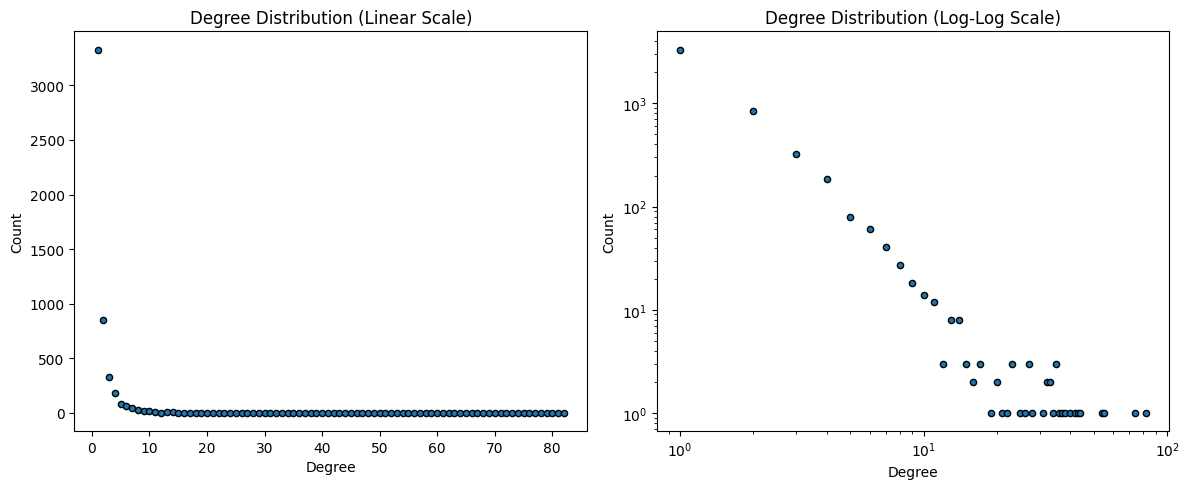

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(bins[1][:-1], bins[0], s=20, edgecolors='black')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (Linear Scale)')
plt.subplot(1, 2, 2)
plt.scatter(bins[1][:-1], bins[0], s=20, edgecolors='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (Log-Log Scale)')
plt.tight_layout()
plt.show()

# Part 1.2: Stats and visualization of the Rock Music Network

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import colormaps

## Building the network

> **Q: Explain your process in words.**

First, an API request is sent to https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers to query the page and return the wikitext. This is then converted into a json format for better readability. With the help of regular expressions, the names of the mainstream rock performers are retrieved.

Second, using a for loop, the inital query is slightly altered to take in as a title the name of a performer, which allows us to query and read the content of the wikipedia page of that performer. Within the loop, with the help of simple string matching, we search if any of the other performers are mentioned in the page. If so, the information that a link exists between them is saved in a dataframe where the columns and rows are that of the performers. This is done to mimick the structure of an adjacency matrix, which is then saved and loaded for analysis shown down below.

While reading the content of the page, the page is split into two parts - before and after references are mentioned, with the help of a regular expression. This is because we assume for content mentioned from and after references to be redundant for obtaining the word count of the page. Additionally, also with the help of regular expressions, we ignore any content structured as "\</ref\> ... \</ref\>" as simply having more text in the url/refrence should not provide any value to the word count of the page. This information is saved in another dataframe also shown below.



In [14]:
# Load files
adjacency_matrix_url = r'https://raw.githubusercontent.com/GermanButtiero/social_graph_assignment1/main/files/rock_artists_adjacency_matrix.csv'
word_count_url = r'https://raw.githubusercontent.com/GermanButtiero/social_graph_assignment1/main/files/rock_artists_word_counts.csv'

adjacency_matrix = pd.read_csv(adjacency_matrix_url, index_col=0)
word_count_df = pd.read_csv(word_count_url)

In [15]:
# Show adjancency matrix
# If there exists a link between two performers, the value is 1, else 0
adjacency_matrix.head(2)

,10cc,10 Years (band),3 Doors Down,311 (band),38 Special (band),AC/DC,Bryan Adams,Aerosmith,AFI (band),Air Supply,...,Steve Winwood,X (American band),X Ambassadors,The Yardbirds,Yes (band),Neil Young,Frank Zappa,Rob Zombie,The Zombies,ZZ Top
10cc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10 Years (band),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Show word count
word_count_df.head(2)

,Artist,Word_Count
0,10cc,10785
1,10 Years (band),4400


Third, the adjacency matrix is used to create a list of nodes and edges (if there exists a link between row i and column j of the dataframe, it implies that there is a link i -> j). These are used as input to create directed graph object. We remove any isolated nodes from the graph. Then, the word count dataframe is used to add the word count as a node attribute to each node in the graph if it exists after the cleaning.

In [17]:
# Get list of nodes and edges
nodes = word_count_df['Artist'].tolist()
edges = []

# Add edges based on adjacency matrix
for artist, targets in adjacency_matrix.iterrows():
    for target, link in targets.items():
        if link != 0:
            edges.append((artist, target))

In [18]:
# Create directed graph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [19]:
# Remove isolated nodes
degree_dict = dict(G.degree())
for artist, degree in degree_dict.items():
    if degree == 0:
        print(f'Removing isolated node: {artist}')
        G.remove_node(artist)

Removing isolated node: The B-52's
Removing isolated node: Dr. Hook & the Medicine Show
Removing isolated node: Jet (Australian band)
Removing isolated node: Van Zant (band)


In [20]:
# Add node weights (word count)
for node in G.nodes():
    if node in word_count_df['Artist'].values.tolist():
        G.nodes[node]['Word count'] = int(word_count_df[word_count_df['Artist'] == node]['Word_Count'].values[0])

Lastly, to get the largest connected component, we make use of the weakly connected components function and retrieve the component with the most nodes. It turns out that the largest connected component consists of all the nodes in the graph so far!

In [ ]:
# Get the largest connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
print(f'Size of the directed graph, G: {len(G.nodes())}')
print(f'Size of the largest connected component in G: {len(largest_cc)}')

Size of the undirected graph, G: 481
Size of the largest connected component in G: 481


The most cumbersome part of this web crawling task was the extraction of relevant information with the help of regular expressions. ChatGPT was used in the making of some these regular expressions but otherwise was an interesting task to explore and do by ourselves.

## Simple network statistics and analysis

> **Q: What is the number of nodes in the network? What is the number of links?**




In [22]:
# Number of nodes and edges
print(f"Number of nodes in the network: {G.number_of_nodes()}")
print(f"Number of edges in the network: {G.number_of_edges()}")

Number of nodes in the network: 481
Number of edges in the network: 8626


There are 481 nodes in the network where each node represents a performer.
There are 8626 links in the network which represent which performer is connected to who and in which way (since it is directed).

> **Q: Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?**


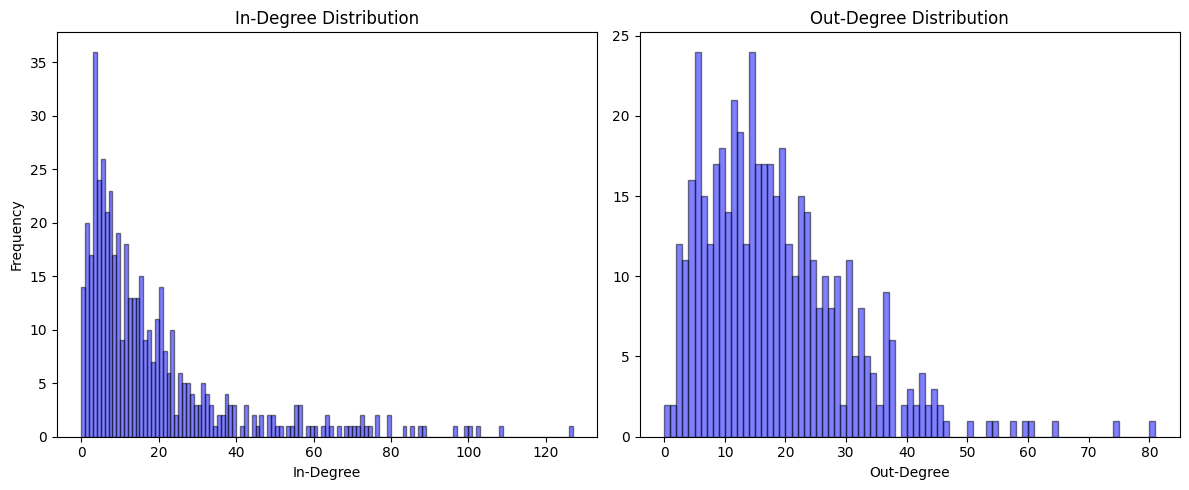

In [23]:
# The in-degrees and out-degrees of all nodes
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Binning
min_in_degree, max_in_degree = min(in_degree.values()), max(in_degree.values())
min_out_degree, max_out_degree = min(out_degree.values()), max(out_degree.values())

in_degree_vector = np.arange(min_in_degree, max_in_degree + 1)
out_degree_vector = np.arange(min_out_degree, max_out_degree + 1)

in_degree_hist = np.histogram(list(in_degree.values()), bins=in_degree_vector)
out_degree_hist = np.histogram(list(out_degree.values()), bins=out_degree_vector)

# Plot in-degree and out-degree distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(in_degree.values(), bins=in_degree_hist[1], color='blue', alpha=0.5, edgecolor='black')
ax[0].set_title('In-Degree Distribution')
ax[0].set_xlabel('In-Degree')
ax[0].set_ylabel('Frequency')

ax[1].hist(out_degree.values(), bins=out_degree_hist[1], color='blue', alpha=0.5, edgecolor='black')
ax[1].set_title('Out-Degree Distribution')
ax[1].set_xlabel('Out-Degree')

plt.tight_layout()
plt.show()

The in-degree represents the amount of links directed *towards* a node, whereas the out-degree represents the amount of links emerging *from* a node. It makes perfect sense for the the in-degree and out-degree distributions to vary as we do not expect there to be a link j->i if i->j exists. If that was the case, then the in-degree and out-degree distributions would look the same but the resulting network would function similar to an undirected network. In directed networks, this phenomenon is expected. 

> **Q: Compare the out-degree distribution to a *random network* with the same number of nodes and links. Compare the in-degree distribution to a *scale-free* network with the same number of nodes.**


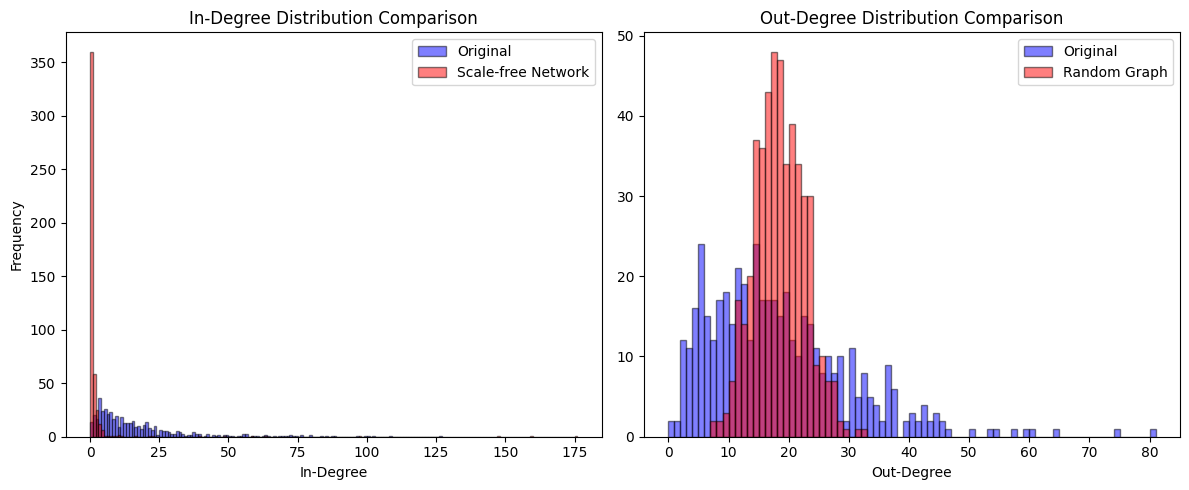

In [24]:
# Compare in-degree distrbution to that from a scale-free network
scale_free_network = nx.scale_free_graph(G.number_of_nodes(), seed=4)
scale_free_in_degree = dict(scale_free_network.in_degree())

# Compare out-degree distribution to that from a random graph
random_network = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges(), directed=True, seed=4)
random_out_degree = dict(random_network.out_degree())

# Binning
min_scale_free_in_degree, max_scale_free_in_degree = min(scale_free_in_degree.values()), max(scale_free_in_degree.values())
min_random_out_degree, max_random_out_degree = min(random_out_degree.values()), max(random_out_degree.values())

scale_free_in_degree_vector = np.arange(min_scale_free_in_degree, max_scale_free_in_degree + 1)
random_out_degree_vector = np.arange(min_random_out_degree, max_random_out_degree + 1)

scale_free_in_degree_hist = np.histogram(list(scale_free_in_degree.values()), bins=scale_free_in_degree_vector)
random_out_degree_hist = np.histogram(list(random_out_degree.values()), bins=random_out_degree_vector)


# Plot comparisons
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(in_degree.values(), bins=in_degree_hist[1], color='blue', alpha=0.5, edgecolor='black', label='Original')
ax[0].hist(scale_free_in_degree.values(), bins=scale_free_in_degree_hist[1], color='red', alpha=0.5, edgecolor='black', label='Scale-free Network')
ax[0].set_title('In-Degree Distribution Comparison')
ax[0].set_xlabel('In-Degree')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(out_degree.values(), bins=out_degree_hist[1], color='blue', alpha=0.5, edgecolor='black', label='Original')
ax[1].hist(random_out_degree.values(), bins=random_out_degree_hist[1], color='red', alpha=0.5, edgecolor='black', label='Random Graph')
ax[1].set_title('Out-Degree Distribution Comparison')
ax[1].set_xlabel('Out-Degree')
ax[1].legend()

plt.tight_layout()
plt.show()

* *In-degree distribution comparison: Scale-free network vs. Original* -- As expected, the in-degree distribution of a scale-free network lacks significant degree variations as it the degree distribution is exponentially bounded. It shows some large hubs which the original network does not indicate. The in-degree distribution of the original network does not exponentially decrease and there is more variation in the frequencies compared to the scale-free network.


* *Out-degree distribution comparison: Random network vs. Original* -- According to the theory, random networks have a lot of nodes that all have a degree within a narrow range, and real-world networks do not. Our out-degree distribution comparision is an example of just that.

Neither the scale-free network nor the random network seem to provide a good approximation of the degree distribution of our original network. This could be due to the relatively small dataset size. With a significant increase in the size of the dataset, we would expect scale-free networks to well approximate the behavior of real-world networks. 

> **Q: Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?**


In [25]:
# Top 5 most connected performers by in-degree
top_5_in_degree = sorted(in_degree.items(), key=lambda x:x[1], reverse=True)[:5]
print("Top 5 most connected performers by in-degree:")
for i, x in enumerate(top_5_in_degree):
    print(f'{i+1}. {x}')

# Top 5 most connected performers by out-degree
top_5_out_degree = sorted(out_degree.items(), key=lambda x:x[1], reverse=True)[:5]
print(f"\nTop 5 most connected performers by out-degree:")
for i, x in enumerate(top_5_out_degree):
    print(f'{i+1}. {x}')

Top 5 most connected performers by in-degree:
1. ('Led Zeppelin', 127)
2. ('The Beatles', 108)
3. ('Bob Dylan', 102)
4. ('Metallica', 100)
5. ('Beck', 99)

Top 5 most connected performers by out-degree:
1. ('Alice in Chains', 81)
2. ('Deep Purple', 74)
3. ('Black Sabbath', 64)
4. ("Guns N' Roses", 60)
5. ('Bryan Adams', 59)


The top 5 most connected performers by in-degree are all some of the most popular rock performers. High in-degree suggests that there are many other performers who refer to them, which makes sense given their popularity and thereby, their influence on the other performers.

The top 5 most connected performers by out-degree also include some pretty well known rock performers. It is noticeable that the top 5 out-degrees are comparably smaller than the top 5 in-degrees. This suggests that although the pages might not contain a lot of references to other performers, the references that do exist might occur more often towards the famous, influential performers shown by the top 5 most connected performers by in-degree.

> **Q: What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?**

In [26]:
# Top 10 pages with the longest wiki entries
top_10_word_count = sorted(nx.get_node_attributes(G, "Word count").items(), key=lambda x:x[1], reverse=True)[:10]
print("Top 10 longest wiki entries:")
for i, x in enumerate(top_10_word_count):
    print(f'{i+1}. {x}')

Top 10 longest wiki entries:
1. ("Guns N' Roses", 60205)
2. ('Coldplay', 46598)
3. ('Marilyn Manson (band)', 45310)
4. ('Queen (band)', 44638)
5. ('U2', 42507)
6. ('Paul McCartney', 42070)
7. ('Bob Dylan', 41941)
8. ('The Rolling Stones', 41861)
9. ('Elton John', 40872)
10. ('David Bowie', 39959)


The top 10 pages with the longest wiki entries are shown above. Guns N' Roses takes the lead with about 60,000 words. The difference between the first and tenth place is 20,000 words which is equivalent to 40 single-spaced pages! It is not even as though Guns N' Roses are that old of a band but their "History" section is the most developed and is the longest in their wikipage.

(They also have 650 references! Good thing that they were removed while we were trying to extract the word count, otherwise, they might have disportionately affected the word count and increased it even further.)

## Simple visualization of the network

In [27]:
# Convert directed to undirected graph
undirected_G = G.to_undirected()

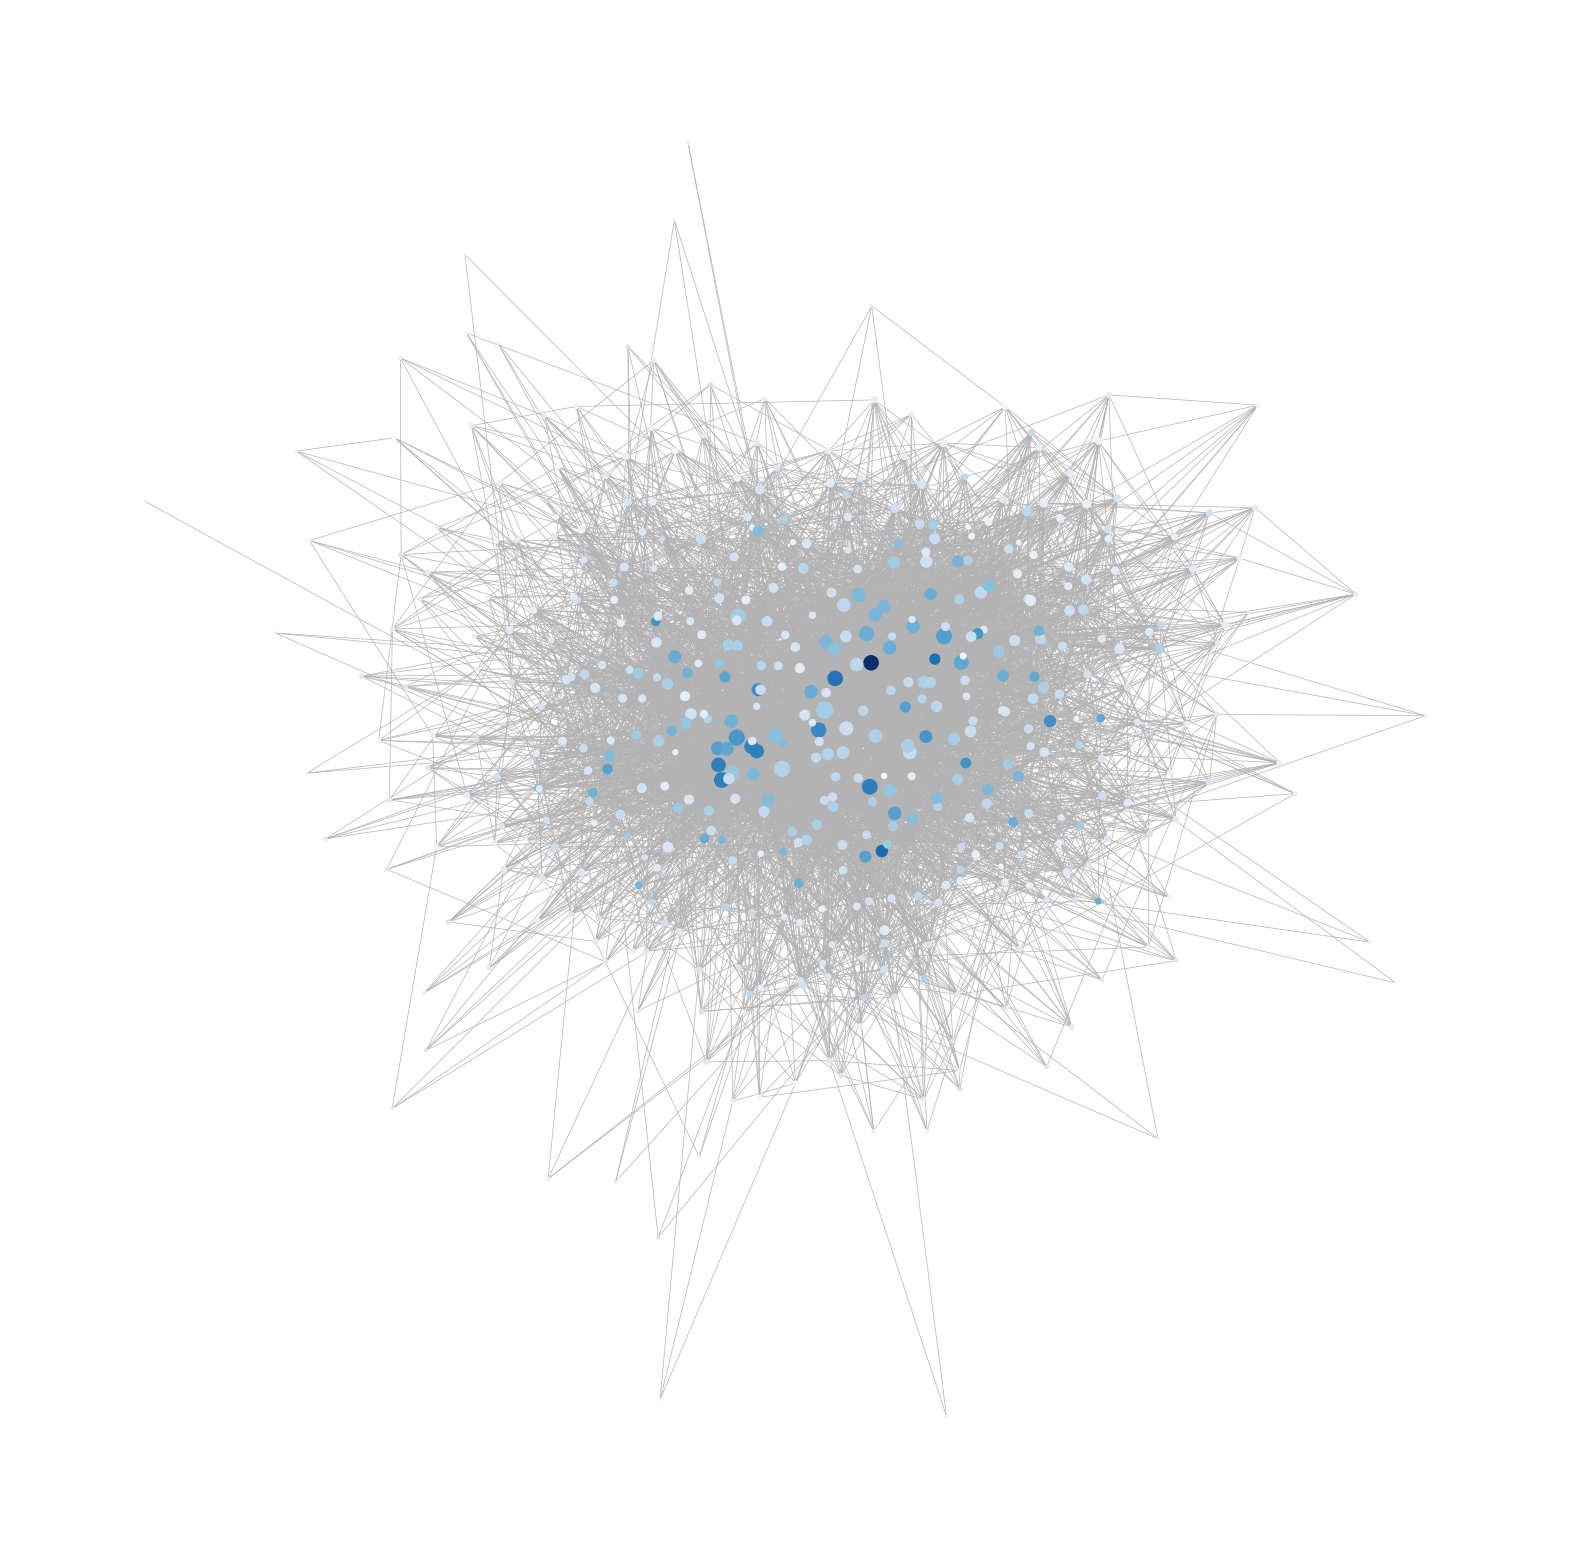

In [28]:
# Normalize word count values to [0, 1] for the colormap
norm = colors.Normalize(vmin=min(word_count_df['Word_Count'].tolist()), vmax=max(word_count_df['Word_Count'].tolist()))
cmap = colormaps.get_cmap('Blues')

# Set node colors based on word count by mapping them to the colormap
node_colors = [cmap(norm(nx.get_node_attributes(undirected_G, "Word count")[artist])) for artist in undirected_G.nodes()]

# Set node sizes based on degree
node_sizes = [undirected_G.degree(artist) for artist in undirected_G.nodes()]

# Plot the graph using a spring layout
fig, ax = plt.subplots(figsize=(20, 20))

options = {
    'node_color': node_colors,
    'node_size': node_sizes,
    'node_shape': 'o',
    'edge_color': '.7',
    'width': 0.5,
}

nx.draw(undirected_G, pos=nx.spring_layout(undirected_G, seed=42), **options)

It seems as though there is not much of a direct relation between the word count of the wikipages of performers and their connections to other performers as the node size of the performer with the highest word count (represented in the darkest shade of blue) is not bigger compared to some of the other nodes which are lighter in shade representing smaller wikipages. 